<a href="https://colab.research.google.com/github/atc00009/DeepLearning-AthiraChitrapal/blob/main/Assgt2Wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

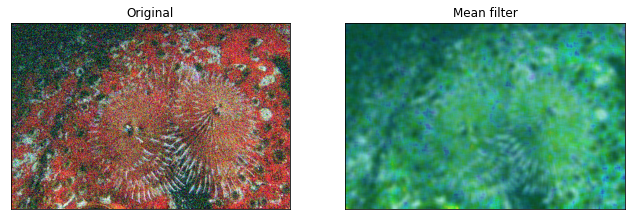

In [13]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('0001.png') # reads the image

image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()


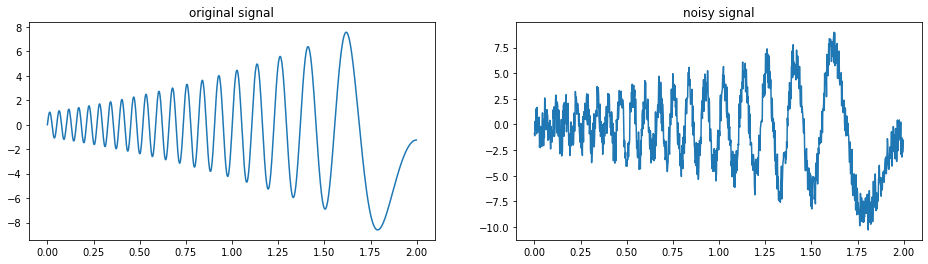

In [14]:
%matplotlib inline
# we will use numpy and matplotlib for all the following examples
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pywt

def doppler(freqs, dt, amp_inc=10, t0=0, f0=np.pi*2):
    t = np.arange(len(freqs)) * dt + t0
    amp = np.linspace(1, np.sqrt(amp_inc), len(freqs))**2
    sig = amp * np.sin(freqs * f0 * t)
    return t,sig

def noisify(sig, noise_amp=1):
    return sig + (np.random.random(len(sig))-0.5)*2*noise_amp
    

t_dop, sig_dop = doppler(np.arange(10,20,0.01)[::-1], 0.002)
sig_dop_n2 = noisify(sig_dop, noise_amp=2)
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.plot(t_dop, sig_dop)
plt.title("original signal")
plt.subplot(122)
plt.plot(t_dop, sig_dop_n2)
plt.title("noisy signal")
plt.show()

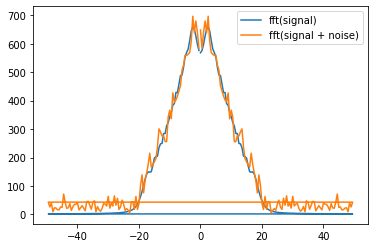

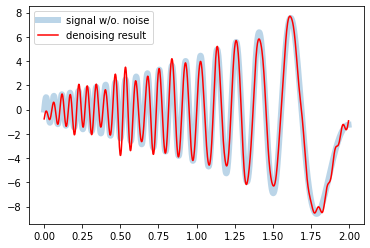

In [15]:
def fourier_denoising(sig, min_freq, max_freq, dt=1.0):
    trans = np.fft.fft(sig)
    freqs = np.fft.fftfreq(len(sig), d=dt)
    trans[np.where(np.logical_or(np.abs(freqs) < min_freq, np.abs(freqs) > max_freq))] = 0
    res = np.fft.ifft(trans)
    return res.real

fsig_dop = np.abs(np.fft.fft(sig_dop))
fsig_dop_n2 = np.abs(np.fft.fft(sig_dop_n2))
freqs_dop = np.fft.fftfreq(len(sig_dop),d=0.002)
idx = np.where(np.abs(freqs_dop) < 50)
plt.plot(freqs_dop[idx], fsig_dop[idx], label="fft(signal)")
plt.plot(freqs_dop[idx], fsig_dop_n2[idx], label="fft(signal + noise)")
plt.legend(loc="best")
plt.show()

fsig_dop_fden = fourier_denoising(sig_dop_n2, 0, 20, dt=0.002)
plt.plot(t_dop, sig_dop, lw=6, alpha=0.3, label="signal w/o. noise")
plt.plot(t_dop, fsig_dop_fden, "r-", label="denoising result")
plt.legend(loc="best")
plt.show()


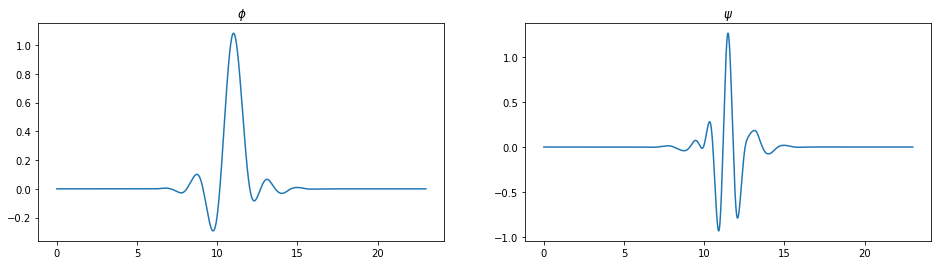

In [16]:
# Daubechies "least asymmetric" wavelets with 12 vanishing points
sym12 = pywt.Wavelet("sym12")
phi_s12, psi_s12, x_s12 = sym12.wavefun(8)
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("$\phi$")
plt.plot(x_s12,phi_s12)
plt.subplot(122)
plt.title("$\psi$")
plt.plot(x_s12,psi_s12)
plt.show()


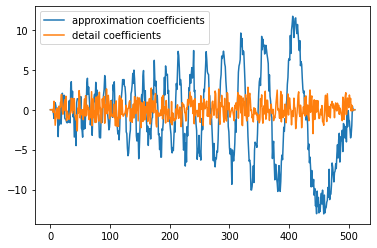

In [17]:
cA, cD = pywt.dwt(sig_dop_n2, "sym12", mode="zero")
plt.plot(cA, label="approximation coefficients")
plt.plot(cD, label="detail coefficients")
plt.legend(loc="best")
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an a

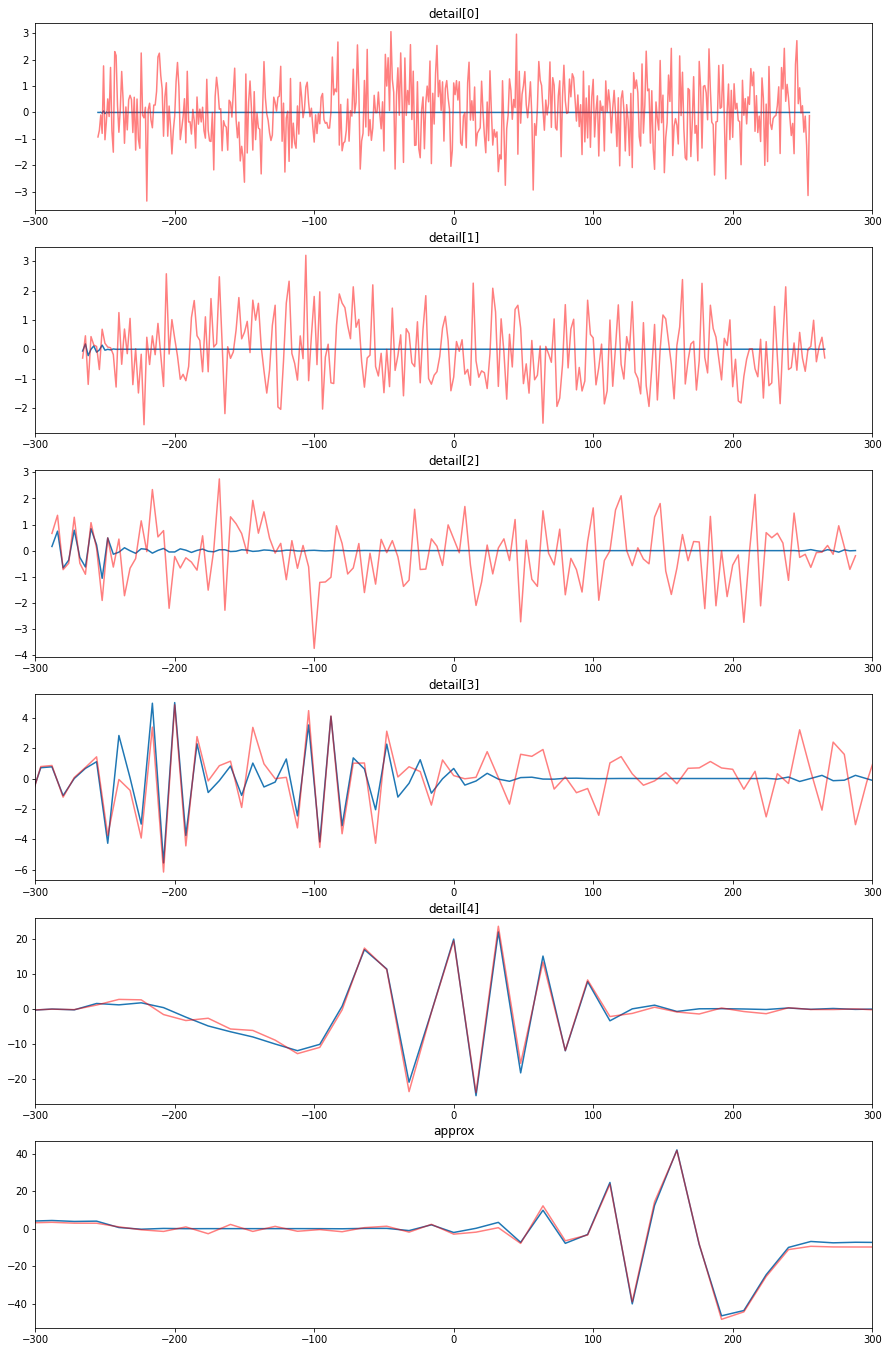

In [12]:
coeffs = pywt.wavedec(sig_dop, "sym12")
approx = coeffs[0]
details = coeffs[1:]
coeffs_n = pywt.wavedec(sig_dop_n2, "sym12")
approx_n = coeffs_n[0]
details_n = coeffs_n[1:]

def plot_dwt(details, approx, xlim=(-300,300), **line_kwargs):
    for i in range(len(details)):
        plt.subplot(len(details)+1,1,i+1)
        d = details[len(details)-1-i]
        half = len(d)//2
        xvals = np.arange(-half,-half+len(d))* 2**i
        plt.plot(xvals, d, **line_kwargs)
        plt.xlim(xlim)
        plt.title("detail[{}]".format(i))
    plt.subplot(len(details)+1,1,len(details)+1)
    plt.title("approx")
    plt.plot(xvals, approx, **line_kwargs)
    plt.xlim(xlim)

plt.figure(figsize=(15,24))
plot_dwt(details, approx)
plot_dwt(details_n, approx_n, color="red", alpha=0.5)
plt.show()